In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("P4-Movie-Ratings.csv")

In [3]:
df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
df.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [5]:
df.columns = ['Film', 'Genre', 'CriticRatings', 'AudienceRatings', 'BudgetMillions', 'Year']

In [6]:
df.head()

,Film,Genre,CriticRatings,AudienceRatings,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Film             559 non-null    object
 1   Genre            559 non-null    object
 2   CriticRatings    559 non-null    int64 
 3   AudienceRatings  559 non-null    int64 
 4   BudgetMillions   559 non-null    int64 
 5   Year             559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [8]:
df.describe()

,CriticRatings,AudienceRatings,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [9]:
df.Year = df.Year.astype('category')
df.Film = df.Film.astype('category')
df.Genre = df.Genre.astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Film             559 non-null    category
 1   Genre            559 non-null    category
 2   CriticRatings    559 non-null    int64   
 3   AudienceRatings  559 non-null    int64   
 4   BudgetMillions   559 non-null    int64   
 5   Year             559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [11]:
df.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

# Each Plot and it's usage
- jointplot -> combination of histogram and scatters (2Col)
- histplot -> show frequency distributions (1Col)
- kernel density estimate (KDE) -> show the distribution of observations in a dataset (2Col)

## JointPlot

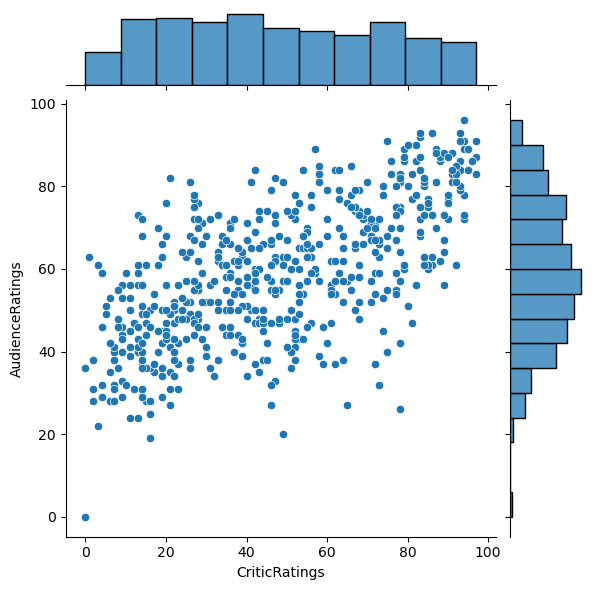

In [12]:
sns.jointplot(data= df, x= 'CriticRatings', y= 'AudienceRatings')
plt.show()

## HistPlot (Histogram)

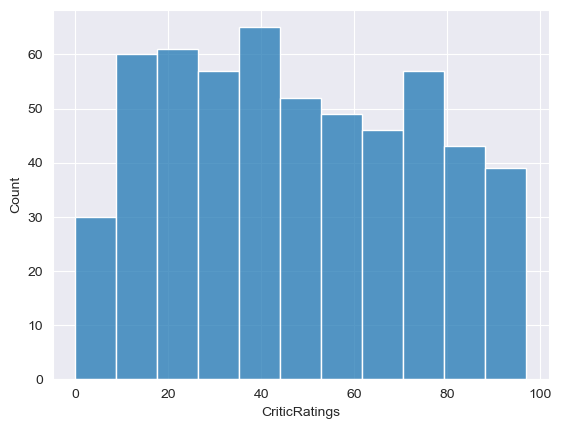

In [13]:
sns.set_style("darkgrid")
sns.histplot(df['CriticRatings'])
plt.show()

## Stacked Histogram

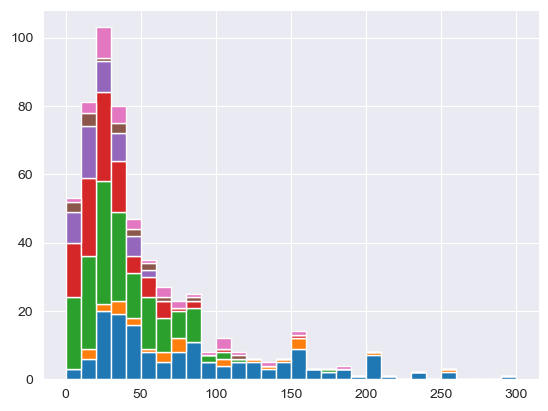

In [14]:
lst = df.Genre.cat.categories
plt.hist([df[df.Genre == categ].BudgetMillions for categ in lst], bins= 30, stacked= True, rwidth= 1)
plt.legend
plt.show()

## KDE Plot

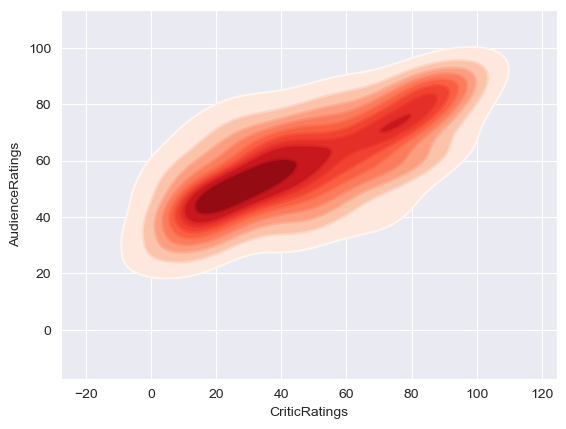

In [15]:
sns.kdeplot(data= df, x= df.CriticRatings, y= df.AudienceRatings, shade= True, shade_lowest= False, cmap= 'Reds')
sns.kdeplot(data= df, x= df.CriticRatings, y= df.AudienceRatings, cmap= 'Reds')
plt.show()

## Sub Plots

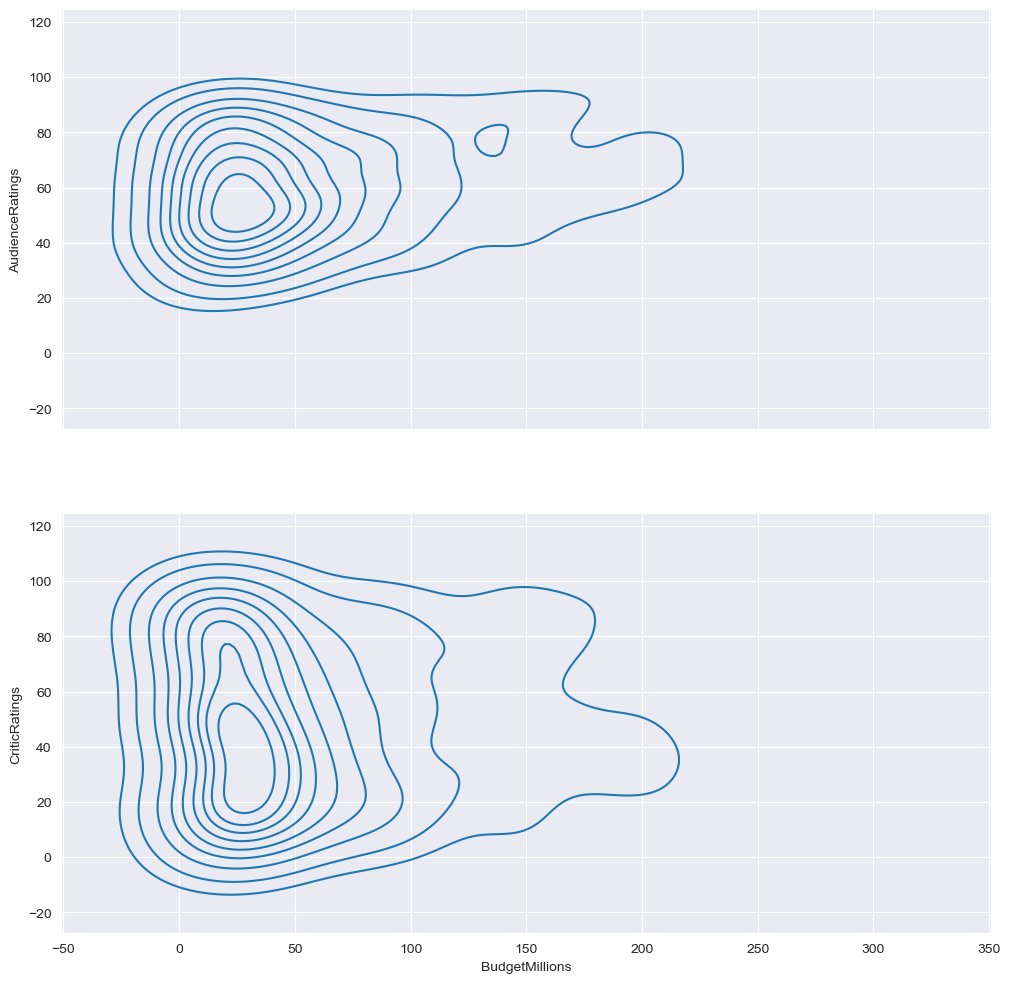

In [16]:
f, axes = plt.subplots(2, 1, figsize= (12, 12), sharex= True, sharey= True)
sns.kdeplot(data= df, x= df.BudgetMillions, y= df.AudienceRatings, ax= axes[0])
sns.kdeplot(data= df, x= df.BudgetMillions, y= df.CriticRatings, ax= axes[1])
plt.show()

## Violin Plots VS Box Plots

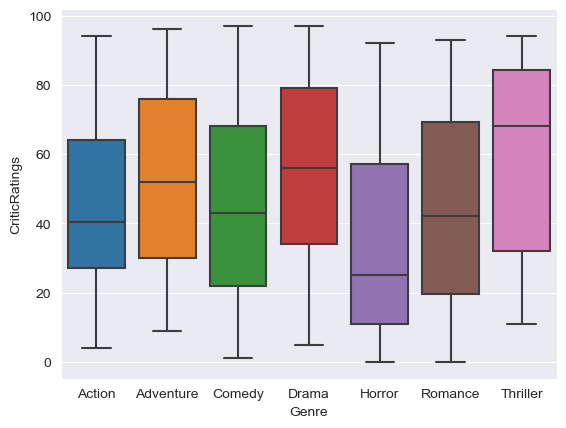

In [17]:
sns.boxplot(data= df, x= 'Genre', y= 'CriticRatings')
plt.show()

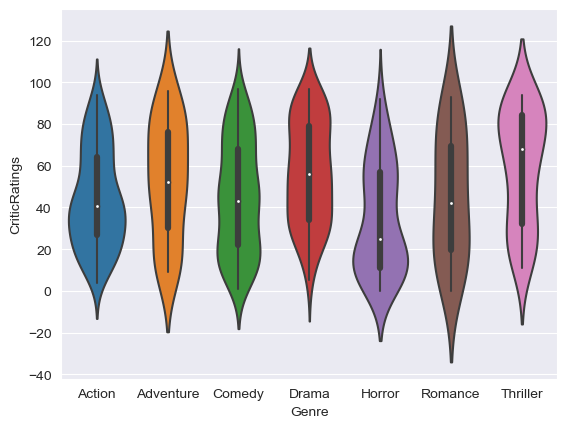

In [18]:
sns.violinplot(data= df, x= 'Genre', y= 'CriticRatings')
plt.show()

## Facet Grid

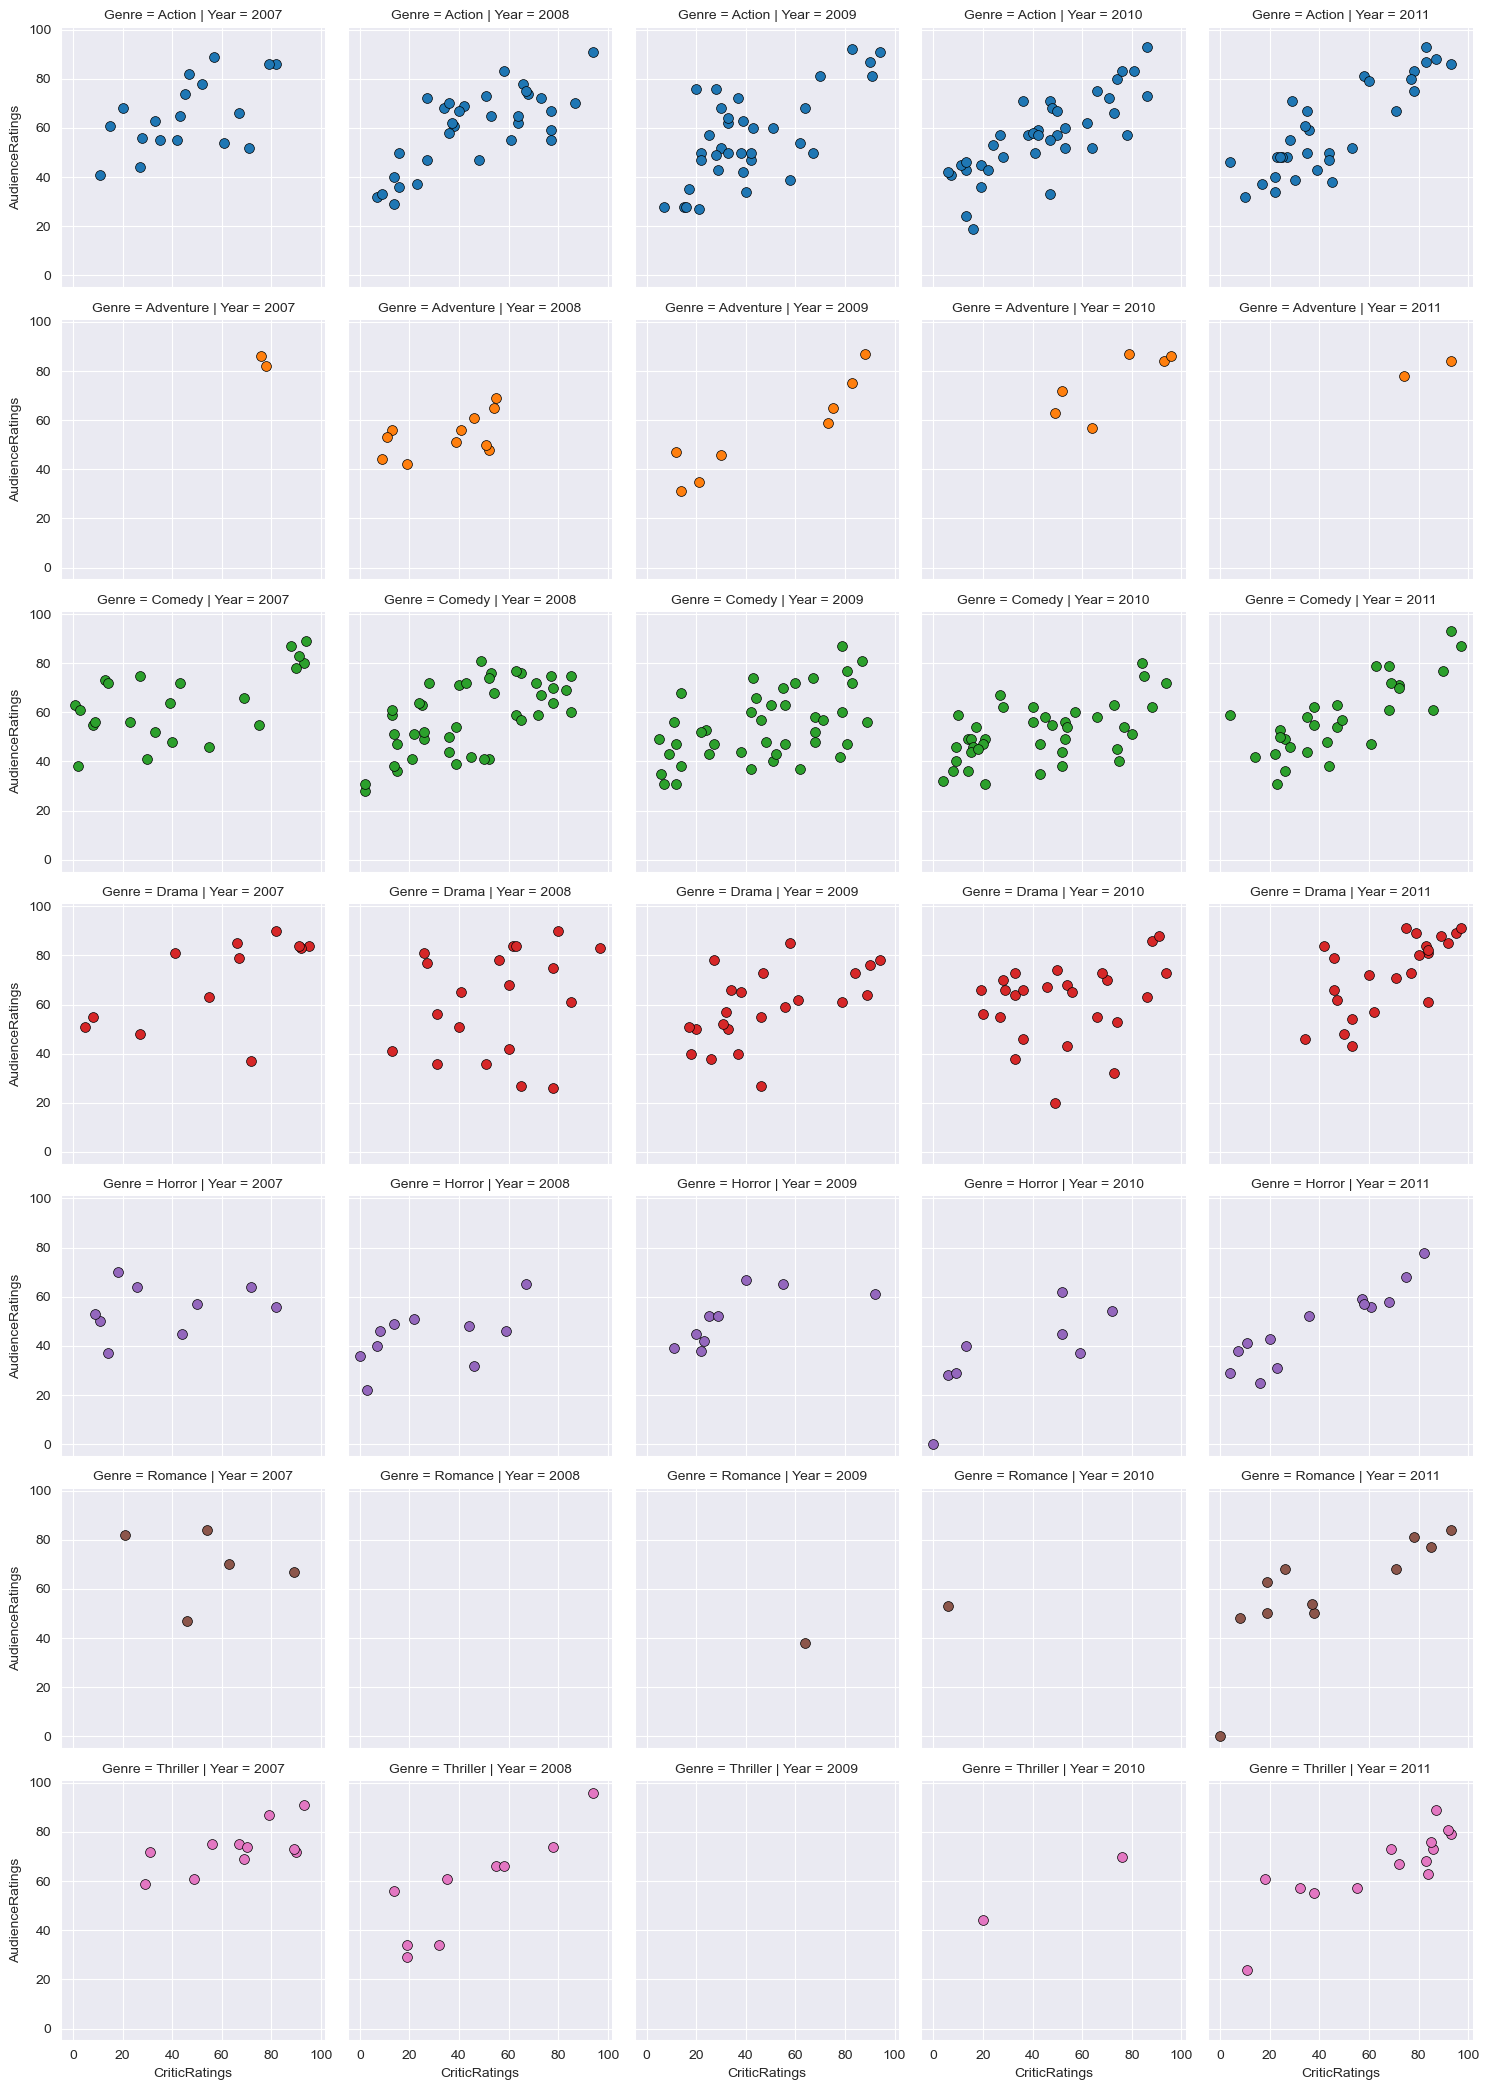

In [19]:
facet = sns.FacetGrid(data= df, row= 'Genre', col= 'Year', hue= 'Genre')
kws = dict(s= 50, linewidth= 0.5, edgecolor= 'Black')
facet = facet.map(plt.scatter, 'CriticRatings', 'AudienceRatings', **kws)

## Coordinates and Diagonals in Facet Grid

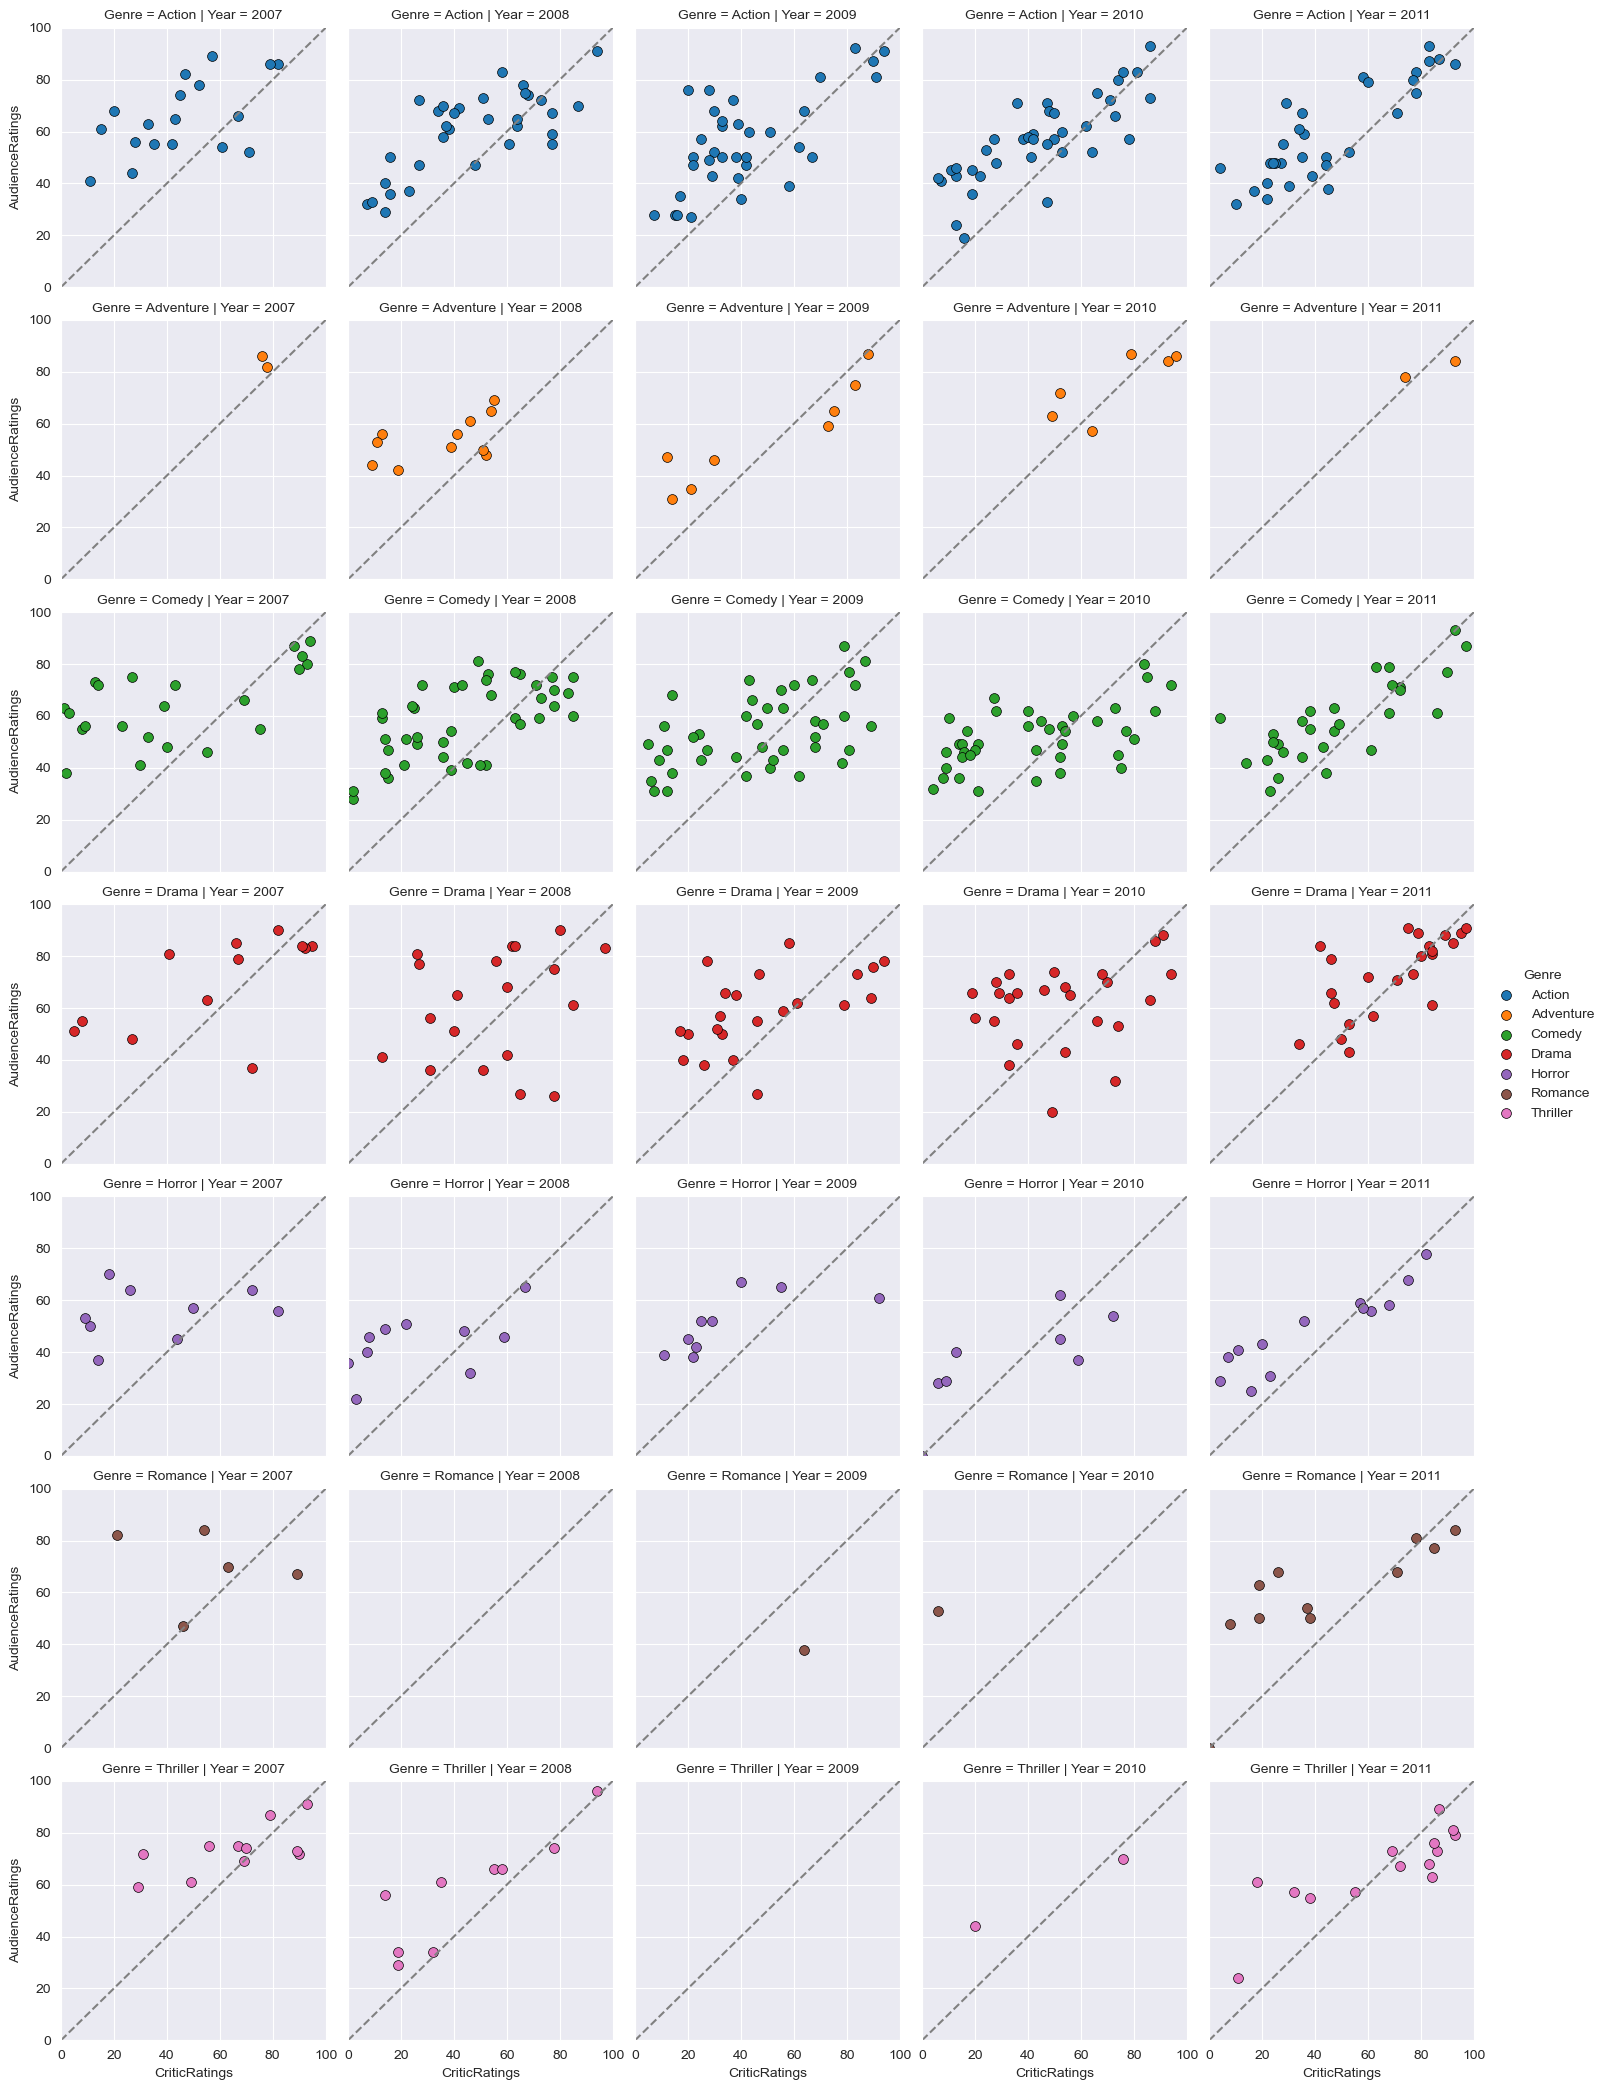

In [20]:
facet = sns.FacetGrid(data= df, row= 'Genre', col= 'Year', hue= 'Genre')
kws = dict(s= 50, linewidth= 0.5, edgecolor= 'Black')
facet = facet.map(plt.scatter, 'CriticRatings', 'AudienceRatings', **kws)
facet.set(xlim= (0, 100), ylim= (0, 100))
for ax in facet.axes.flat:
    ax.plot((0, 100), (0, 100), c= 'gray', ls= '--') # start, end, color, type of line (dotted)
facet.add_legend()

# Final Dashboard

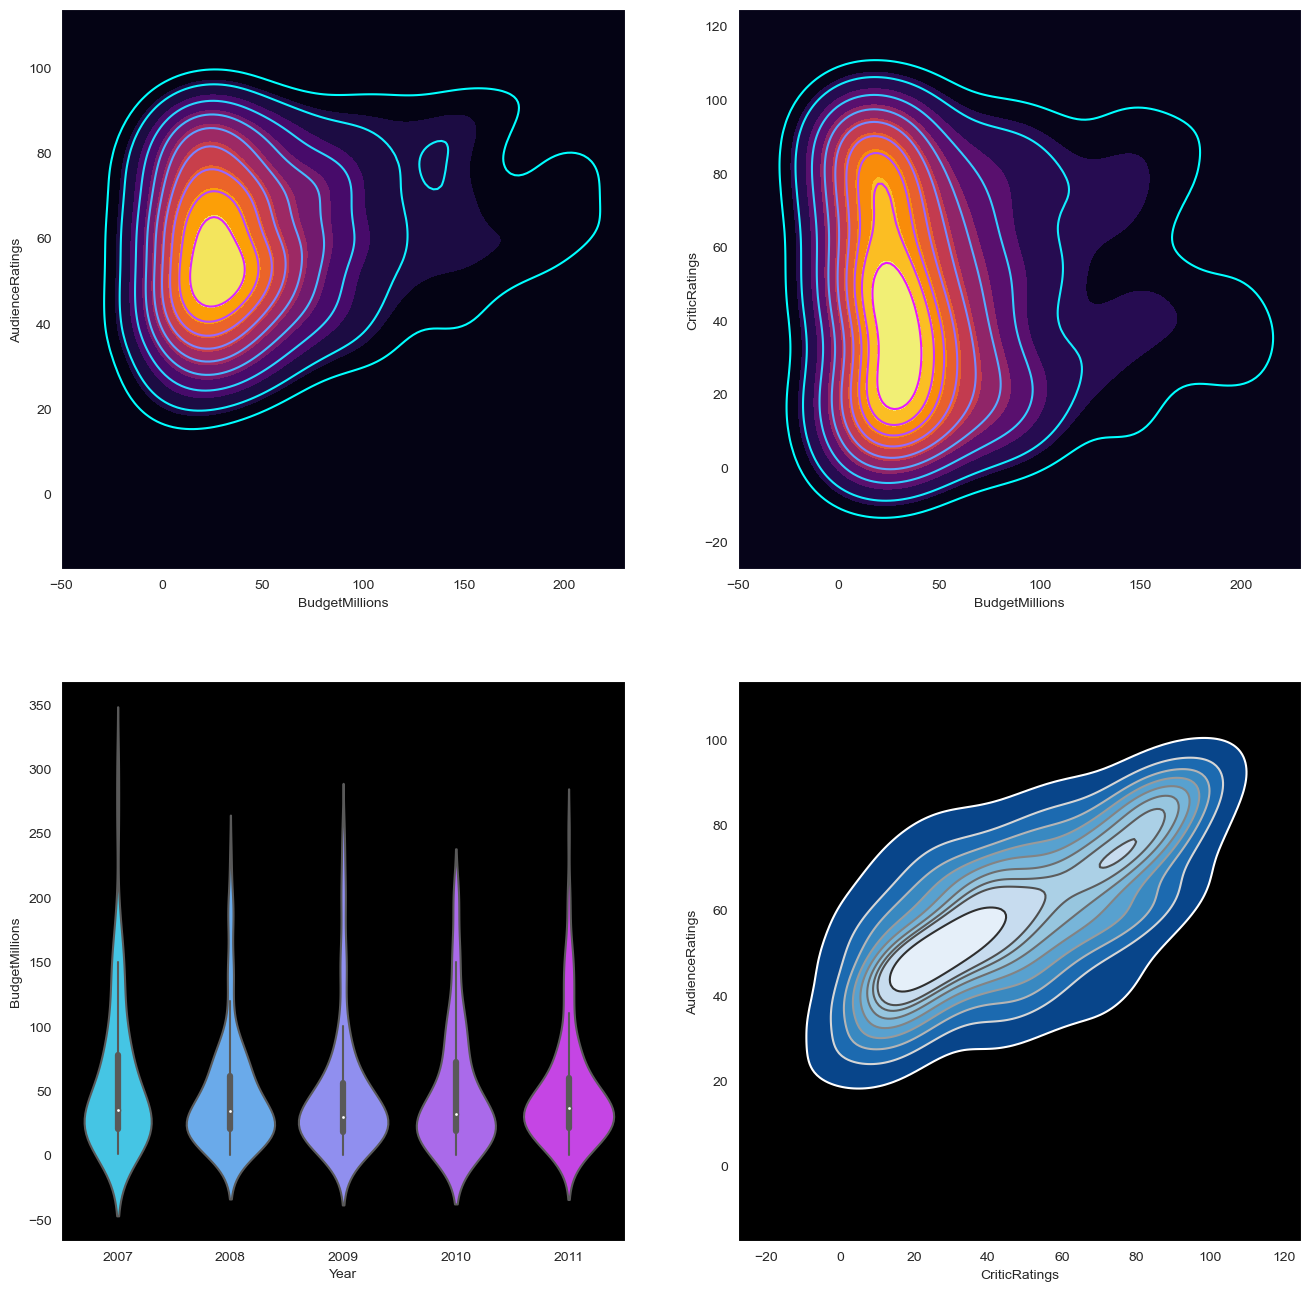

In [21]:
sns.set_style('dark', {'axes.facecolor': 'black'})
f, axes = plt.subplots(2, 2, figsize= (16, 16))
k1= sns.kdeplot(data= df, x= df.BudgetMillions, y= df.AudienceRatings, ax= axes[0, 0],
               shade= True, shade_lowest= True, cmap= 'inferno')
k1a= sns.kdeplot(data= df, x= df.BudgetMillions, y= df.AudienceRatings, ax= axes[0, 0], cmap= 'cool')

k2= sns.kdeplot(data= df, x= df.BudgetMillions, y= df.CriticRatings, ax= axes[0, 1],
               shade= True, shade_lowest= True, cmap= 'inferno')

k2a= sns.kdeplot(data= df, x= df.BudgetMillions, y= df.CriticRatings, ax= axes[0, 1], cmap= 'cool')

z= sns.violinplot(data= df, x= 'Year', y= 'BudgetMillions', ax= axes[1, 0], palette= 'cool')

k3= sns.kdeplot(data= df, x= df.CriticRatings, y= df.AudienceRatings, 
                shade= True, shade_lowest= False, cmap= 'Blues_r', ax= axes[1, 1])

k3a= sns.kdeplot(data= df, x= df.CriticRatings, y= df.AudienceRatings, cmap= 'gist_gray_r', ax= axes[1, 1])

k1.set(xlim= (-50, 230))
k2.set(xlim= (-50, 230))
plt.show()

## Editing

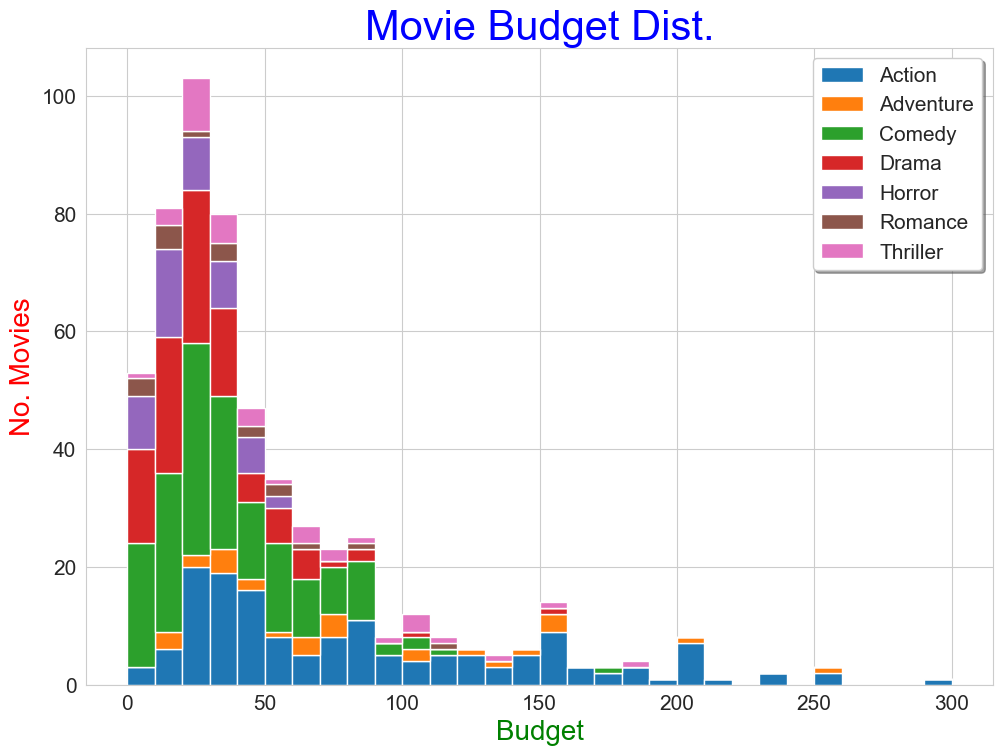

In [22]:
lst= list()
labels= list()
for item in df.Genre.cat.categories:
    lst.append(df[df.Genre == item].BudgetMillions)
    labels.append(item)
    
sns.set_style('whitegrid')
fig, axes = plt.subplots()
fig.set_size_inches(11.7, 8.27) # A4 P
h = plt.hist(lst, bins= 30, stacked= True, rwidth= 1, label= labels)
plt.title('Movie Budget Dist.', fontsize= 30, color= 'Blue')
plt.xlabel('Budget', fontsize= 20, color= 'Green')
plt.ylabel('No. Movies', fontsize= 20, color= 'Red')
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.legend(prop= {'size': 15}, shadow= True)
plt.show()